# Assignment simple linear regression

* We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression.
* We want to build a simple model to determine how well Years Worked predicts an employee’s salary.

Import the data salary.csv to a Jupyter Notebook. A description of the variables is given in Salary Metadata. You will need the packages matplotlib, pandas and statsmodels.

In [207]:
import pandas as pd
import numpy as np 
from sklearn import datasets,linear_model
import matplotlib.pyplot as plt
import statsmodels as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
raw_data = pd.read_csv('salary.csv')
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

* finding missing values
* filling missing values

In [208]:
raw_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

there is only one missing values in the column salary

filling missing values

In [209]:
# raw_data.salary.fillna(raw_data.salary.mean(), inplace=True)
raw_data.dropna(inplace=True)

### 1. Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

* splitting data
* finding missing values


In [216]:
x = raw_data.yearsworked
y = raw_data.salary
train_data, test_data = train_test_split(raw_data, test_size=0.2, random_state=0)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 298 to 192
Data columns (total 11 columns):
salary         410 non-null float64
exprior        410 non-null int64
yearsworked    410 non-null int64
yearsrank      410 non-null int64
market         410 non-null float64
degree         410 non-null int64
otherqual      410 non-null int64
position       410 non-null int64
male           410 non-null int64
Field          410 non-null int64
yearsabs       410 non-null int64
dtypes: float64(2), int64(9)
memory usage: 38.4 KB


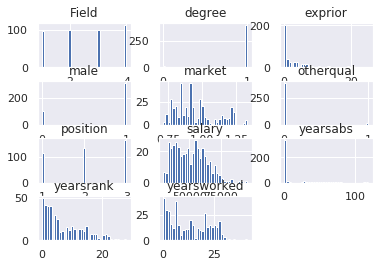

In [219]:
train_data.hist(bins=35)
plt.show()

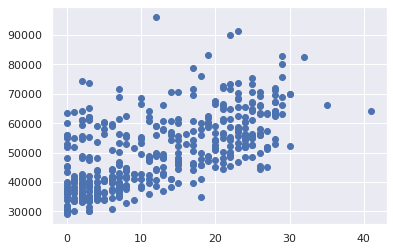

In [220]:
plt.scatter(x='yearsworked', y='salary', data=train_data)
plt.show()

### 2.Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

In [221]:
y_train = train_data['salary']
x_train = train_data['yearsworked']
x = sm.add_constant(x_train)
model = sm.OLS(y_train,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     246.3
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           9.07e-44
Time:                        14:25:58   Log-Likelihood:                -4354.1
No. Observations:                 410   AIC:                             8712.
Df Residuals:                     408   BIC:                             8720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.019e+04    826.783     48.607      0.000    3.86e+04    4.18e+04
yearsworked   821.2542     52.325     15.695      0.000     718.394     924.115
==============================================================================
Omnibus:                       66.740   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.376
Skew:                           1.049   Prob(JB):                     2.63e-22
Kurtosis:                       4.191   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

In [222]:
# checking if my model predicts correct values
model.predict([1,0])

array([40187.77966145])

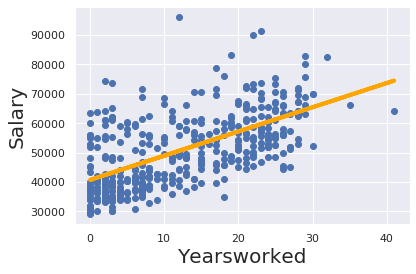

In [223]:
plt.scatter(x='yearsworked', y='salary', data=train_data)
yhat = 822.9658*x_train + 40720
fig = plt.plot(x_train, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Yearsworked', fontsize =20)
plt.ylabel('Salary', fontsize =20)
plt.show()

What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

### 3.What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

### 4.What do the 95% confidence intervals [0.025, 0.975] mean?

### 5.Calculate the expected salary for someone with 12 years’ work experience.

In [202]:
print('12years work experience salary',model.predict([1,12]))

12years work experience salary [50597.94279386]


### 6.Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [200]:
print('model prediction =',model.predict([1,80]))
print('regression formula prediction =', 840.1199*80 + 39790)
print('no problems')

model prediction = [106559.61858193]
regression formula prediction = 106999.592
no problems


### 7.We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

In [162]:
raw_data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361447,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


#### employee characteristics might influence their salary
* position
* years rank
* market